# Inflation data from the Netherlands from 2000 till august 2022 (2015 = 100)

#### Import packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Import and form the data

Not all data were complete, so two datasets were combined. The datasets are from: "https://opendata.cbs.nl/statline#/CBS/nl/dataset/83131NED/table?ts=1663833819269"  

In [2]:
# Import the datasets en combine them
inflation_Netherlands = pd.read_excel("CPI_prijsindex_jaarmaand.xlsx", index_col = 0)
inflation_Netherlands.insert(10, "CPI_energiejaarlijks", pd.read_excel("CPI_energie(afgeleid).xlsx"))

In [3]:
# Make an extra column (energycosumption - 100)
inflation_Netherlands['CPI_energie-100'] = inflation_Netherlands.apply(lambda column: column.CPI_energie - 100, axis=1)

In [4]:
# Columns on different places 
inflation_Netherlands = inflation_Netherlands[['Jaar', 'Maand', 'CPI_energie', 'CPI_energie-100', 'CPI(afgeleid)_energie ', 'CPI_algemeen',
 'CPI(algemeen)_afgeleid', 'CPI_elektriciteit',
 'CPI(elektriciteit)_afgeleid', 'CPI_gas', 'CPI(gas)_afgeleid', 'CPI_energiejaarlijks']]

In [5]:
inflation_Netherlands.tail()

,Jaar,Maand,CPI_energie,CPI_energie-100,CPI(afgeleid)_energie,CPI_algemeen,CPI(algemeen)_afgeleid,CPI_elektriciteit,CPI(elektriciteit)_afgeleid,CPI_gas,CPI(gas)_afgeleid,CPI_energiejaarlijks
Perioden,,,,,,,,,,,,
2022 april,2022,april,255.21,155.21,273.77,119.81,119.21,179.22,355.13,314.68,244.00,136.4
2022 mei,2022,mei,221.75,121.75,241.74,119.05,118.46,154.06,313.85,273.63,214.06,104.9
2022 juni,2022,juni,201.81,101.81,222.65,119.05,118.47,144.90,298.82,241.73,190.79,83.5
2022 juli,2022,juli,240.60,140.60,222.65,121.57,121.88,170.78,372.12,294.97,253.31,107.8
2022 augustus,2022,augustus,294.51,194.51,342.43,123.95,124.45,198.90,423.33,376.92,319.67,151.4


#### Fast look at the data

The main features of the dataset are CPI_energie, CPI_elektriciteit and CPI_gas. This is because these data say something about the monthly inflation of energy, electricity and gas in the Netherlands. 

In [6]:
# Show columns 
print(inflation_Netherlands.columns.values)

['Jaar' 'Maand' 'CPI_energie' 'CPI_energie-100' 'CPI(afgeleid)_energie '
 'CPI_algemeen' 'CPI(algemeen)_afgeleid' 'CPI_elektriciteit'
 'CPI(elektriciteit)_afgeleid' 'CPI_gas' 'CPI(gas)_afgeleid'
 'CPI_energiejaarlijks']


In [7]:
# Show some information about the data
inflation_Netherlands.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 2000 januari to 2022 augustus
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Jaar                         272 non-null    int64  
 1   Maand                        272 non-null    object 
 2   CPI_energie                  272 non-null    float64
 3   CPI_energie-100              272 non-null    float64
 4   CPI(afgeleid)_energie        272 non-null    float64
 5   CPI_algemeen                 272 non-null    float64
 6   CPI(algemeen)_afgeleid       272 non-null    float64
 7   CPI_elektriciteit            272 non-null    float64
 8   CPI(elektriciteit)_afgeleid  272 non-null    float64
 9   CPI_gas                      272 non-null    float64
 10  CPI(gas)_afgeleid            272 non-null    float64
 11  CPI_energiejaarlijks         272 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 27.6+ KB


In [8]:
# How much columns and rows?
inflation_Netherlands.shape

(272, 12)

In [9]:
# Show the head of the dataset
inflation_Netherlands.head()

,Jaar,Maand,CPI_energie,CPI_energie-100,CPI(afgeleid)_energie,CPI_algemeen,CPI(algemeen)_afgeleid,CPI_elektriciteit,CPI(elektriciteit)_afgeleid,CPI_gas,CPI(gas)_afgeleid,CPI_energiejaarlijks
Perioden,,,,,,,,,,,,
2000 januari,2000,januari,52.22,-47.78,65.20,73.55,77.17,69.63,78.38,43.70,57.67,9.3
2000 februari,2000,februari,52.29,-47.71,65.28,74.00,77.64,69.84,78.62,43.69,57.66,9.4
2000 maart,2000,maart,52.73,-47.27,65.84,74.66,78.33,71.36,80.33,43.62,57.56,10.3
2000 april,2000,april,52.74,-47.26,65.85,74.78,78.46,71.38,80.35,43.62,57.56,10.7
2000 mei,2000,mei,52.74,-47.26,65.85,75.02,78.69,71.38,80.35,43.62,57.56,10.7


#### Mean, maximum and minimum CPI

In [10]:
# Calculate mean
inflation_Netherlands['CPI_energie-100'].mean()

# Conclusion: this does not say much, as the year 2015 is the average year (year 0)

-3.9078676470588314

In [11]:
# Calculate maximum CPI 
inflation_Netherlands['CPI_energie-100'].max()

194.51

In [12]:
# Calculate minimum CPI
inflation_Netherlands['CPI_energie-100'].min()

-47.78

In [13]:
# Describe the dataset 
inflation_Netherlands.describe()

,Jaar,CPI_energie,CPI_energie-100,CPI(afgeleid)_energie,CPI_algemeen,CPI(algemeen)_afgeleid,CPI_elektriciteit,CPI(elektriciteit)_afgeleid,CPI_gas,CPI(gas)_afgeleid,CPI_energiejaarlijks
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,2010.841912,96.092132,-3.907868,100.757904,93.780956,95.043676,94.579596,107.494596,98.261691,97.708162,8.012500
std,6.554963,30.760188,30.760188,31.066840,10.687303,9.151495,17.390734,43.990061,42.461601,29.021844,21.345566
min,2000.000000,52.220000,-47.780000,65.200000,73.550000,77.170000,65.940000,76.920000,43.620000,57.560000,-17.200000
25%,2005.000000,83.307500,-16.692500,91.762500,84.980000,87.410000,85.250000,93.707500,76.560000,89.570000,-0.825000
50%,2011.000000,95.765000,-4.235000,99.955000,93.765000,95.705000,94.755000,102.225000,99.490000,97.055000,5.650000
75%,2016.250000,103.430000,3.430000,105.775000,100.910000,100.845000,100.892500,107.267500,106.097500,105.285000,9.850000
max,2022.000000,294.510000,194.510000,342.430000,123.950000,124.450000,198.900000,423.330000,376.920000,319.670000,157.400000


#### Visualise the dataset

The visualisation is done in several ways. The graph shows that the year 2022 is a very high energy inflation year. On average, inflation gets higher every year. 

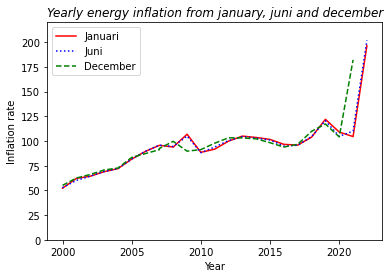

In [14]:
# Monthly energy inflation from January, June and December of the year 2000 to 2022

# Create data frames for the three months
januari_df = inflation_Netherlands[inflation_Netherlands['Maand'].str.contains('januari')]
juni_df = inflation_Netherlands[inflation_Netherlands['Maand'].str.contains('juni')]
december_df = inflation_Netherlands[inflation_Netherlands['Maand'].str.contains('december')]

# Create the plot of several pandas data frames
ax = januari_df.plot(x='Jaar', y='CPI_energie', color='red', label='Januari', linestyle='solid')
juni_df.plot(ax=ax, x='Jaar', y='CPI_energie', color='blue', label='Juni', linestyle='dotted')
december_df.plot(ax=ax, x='Jaar', y='CPI_energie', color='green', label='December', linestyle='dashed')

plt.ylim(0, 220)

plt.title("Yearly energy inflation from january, juni and december", style='oblique')

plt.xlabel('Year')
plt.ylabel('Inflation rate')

plt.legend()
plt.show()

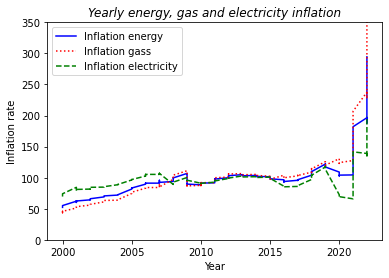

In [15]:
# Annual energy inflation of average, electricity and gas.

# Make the plot
ax = plt.gca() 

inflation_Netherlands.plot(ax=ax, x='Jaar', y='CPI_energie', color='blue', label='Inflation energy', linestyle='solid')
inflation_Netherlands.plot(ax=ax, x='Jaar', y='CPI_gas', color='red', label='Inflation gass', linestyle='dotted')
inflation_Netherlands.plot(ax=ax, x='Jaar', y='CPI_elektriciteit', color='green', label='Inflation electricity', linestyle='dashed')

plt.ylim(0, 350)

plt.title('Yearly energy, gas and electricity inflation', style='italic')

plt.xlabel('Year')
plt.ylabel('Inflation rate')

plt.legend()

plt.show()

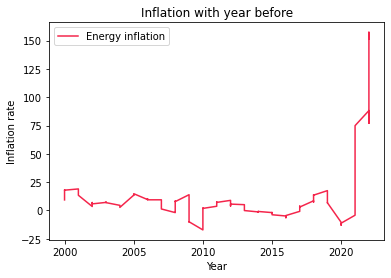

In [16]:
# Look at the data on energy inflation with the year before, so 2015 is not year zero

# Make the plot
lines_yearly_inflation = inflation_Netherlands.plot.line(x='Jaar', y='CPI_energiejaarlijks', title="Inflation with year before", color="#F4254B", label="Energy inflation")

plt.xlabel('Year')
plt.ylabel('Inflation rate')

plt.show()

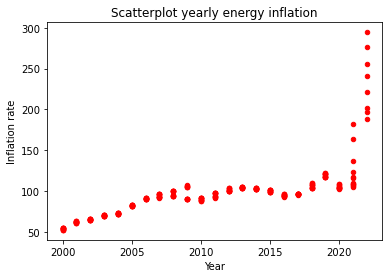

In [17]:
# Scatterplot annual energy inflation 

# Make the plot
inflation_Netherlands.plot.scatter(x="Jaar",
                                      y='CPI_energie', color='red')

plt.title("Scatterplot yearly energy inflation")
plt.xlabel('Year')
plt.ylabel('Inflation rate')
ax.legend(facecolor='white')

plt.show()


#### Save as a new Excel-sheet

In [18]:
inflation_Netherlands.to_excel('Inflationfile.xlsx')